<h1> Human Activity Recognition </h1>

<h4> This project is to build a model that predicts the human activites such as walking, walking_upstairs, downstairs, sitting, standing, or laying</h4><br>
This dataset is collected from 30 persons ( reffered as subject here), performing different activites with a smartphone in their hands that records with the help of sensors(accelerometer, gyroscope) in it.

By using the sensors in the smartphone thay have captured '3axial linear acceleration' (tAcc-XYZ) from acceleration and (tGyro-XYZ) from gyroscope with several variations.

### Feature names:

1. These sonsor signals are preprocessed by applying noise filters and then sampled in fixed-width windows of 2.56 sec.with 50% overlapping ( ie., each window has 128 readings)

2. From each window feature vectors are calculated using time and frequency domain.

3. The accelaration signal was separated into Body and Gravity acceleration signals(__tBodyAcc-XYZ and tGravityAcc-XYZ__) using some low pass filters with some corner frequency of 0.3Hz

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like __tBodyAccMag , tGravityAccMag , tBodyAccJerkMag , tBodyGyroMa and tBodyGyroJerkMag__.

6. 6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag
    
8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.
    
    
###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
### Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'features.txt'
     - ___Train Data___
         - 'X_train.txt'
         - 'subject_train.txt'
         - 'y_train.txt'
     - ___Test Data___
         - 'X_test.txt'
         - 'subject_test.txt'
         - 'y_test.txt'
         

### Data Size :
> 27 MB

# Quick overview of dataset:

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.
    
* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.

## Problem Statement:
* Given a new dataset we have to predict the activity

### Loading and Reading the data:

In [2]:
import numpy as np
import pandas as pd

# get the feature from the file feature.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print("Number of features are : {}".format(len(features)))


Number of features are : 561


# Obtain the train data

In [14]:
#https://stackoverflow.com/questions/57572126/why-i-am-getting-error-duplicate-names-are-not-allowed

X_train = pd.read_csv('X_train.txt',delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


In [24]:
# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(4)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6272,0.280385,-0.006891,-0.136376,-0.986368,-0.944009,-0.924621,-0.987254,-0.942402,-0.915482,-0.929076,...,0.018909,-0.231963,-0.332775,-0.393027,-0.762981,0.258172,0.053681,28,5,STANDING
3029,0.292394,-0.017302,-0.124885,-0.357067,-0.077750,-0.269082,-0.425151,-0.082016,-0.326528,-0.030328,...,-0.561998,0.839149,0.813394,0.744177,-0.490785,0.294801,0.313142,16,2,WALKING_UPSTAIRS
5913,0.270153,-0.016308,-0.100933,-0.996244,-0.991705,-0.996808,-0.996551,-0.992283,-0.997007,-0.941710,...,-0.018633,-0.553748,0.081726,-0.375952,-0.321913,-0.201895,-0.334370,27,4,SITTING
3877,0.212083,-0.025783,-0.110508,-0.923408,-0.957639,-0.988852,-0.923822,-0.954798,-0.988565,-0.891713,...,-0.002301,0.162750,-0.391645,-0.211397,0.884964,-0.445315,-0.505062,19,6,LAYING


In [18]:
train.shape

(7352, 564)

# Obtain the test data:

In [16]:
X_test = pd.read_csv('X_test.txt',delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

In [25]:
# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(4)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
944,0.291368,-0.025836,-0.098166,-0.976357,-0.920009,-0.988522,-0.976314,-0.918001,-0.989735,-0.914311,...,-0.179106,0.153002,0.432925,-0.383324,-0.685298,-0.105621,-0.068602,10,4,SITTING
1698,0.275902,-0.012850,-0.100900,-0.996616,-0.975543,-0.988901,-0.997632,-0.976580,-0.990976,-0.941521,...,0.095364,0.096822,0.695956,-0.787586,-0.815535,0.207119,-0.050960,13,5,STANDING
2776,0.280187,-0.020511,-0.100368,-0.993441,-0.945031,-0.947215,-0.993777,-0.944029,-0.941956,-0.938729,...,-0.083629,-0.086293,0.054012,0.144988,-0.826638,0.185667,0.103228,24,5,STANDING
621,0.272206,-0.017500,-0.094574,-0.984967,-0.985064,-0.944798,-0.985878,-0.984934,-0.939967,-0.937929,...,0.066189,0.100794,-0.012095,0.287371,-0.852829,0.118220,-0.087415,9,5,STANDING


In [19]:
test.shape

(2947, 564)

# Data Cleaning and preprocessing:

## 1 Check for Duplicates

In [21]:
print("No of duplicates in train dataset is : {}".format(sum(train.duplicated())))
print("No of duplicates in test dataset is : {}".format(sum(test.duplicated())))

No of duplicates in train dataset is : 0
No of duplicates in test dataset is : 0


## 2 Checking for NAN/ null values

In [23]:
print("number of null value in train dataset is {}".format(train.isnull().values.sum()))
print("number of null value in test dataset is {}".format(test.isnull().values.sum()))

number of null value in train dataset is 0
number of null value in test dataset is 0


## 3 Check for data imbalance

In [26]:
# https://matplotlib.org/3.5.3/gallery/text_labels_and_annotations/font_family_rc_sgskip.html

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

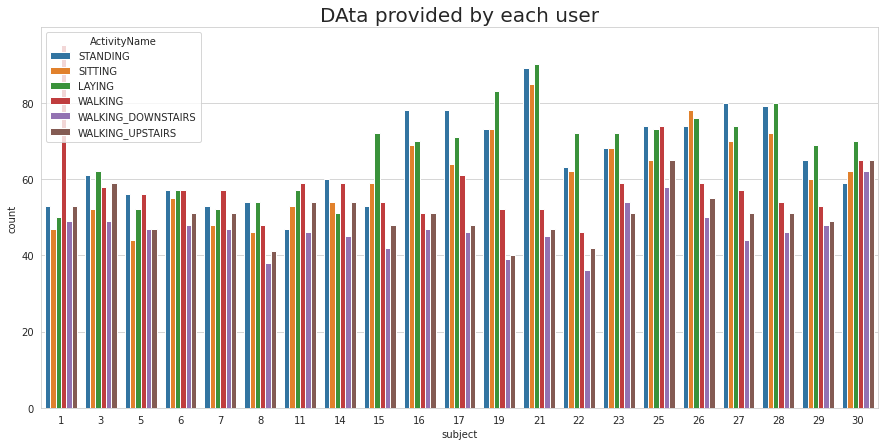

In [28]:
plt.figure(figsize=(15,7))
plt.title("DAta provided by each user", fontsize=20)
sns.countplot(x='subject', hue='ActivityName',data=train)
plt.show()

__We have got almost same number of reading from each subject, subject between 16 and 21 seams to have a little imbalance__

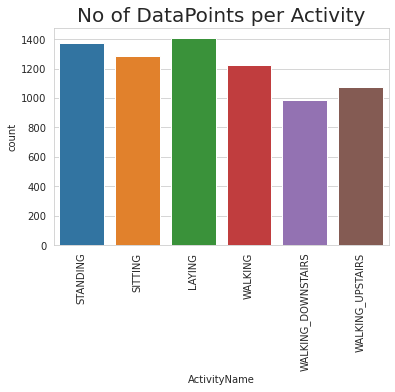

In [34]:
import warnings
warnings.filterwarnings('ignore')

# number of data points per activity
plt.title("No of DataPoints per Activity", fontsize=20)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

__we have almost same number of data for each class labels__

So our data is almost balance

In [32]:
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4737,0.279847,-0.017609,-0.111628,-0.998772,-0.992505,-0.987961,-0.999121,-0.99214,-0.987864,-0.941565,...,-0.097243,0.002075,-0.555953,0.478955,-0.71873,-0.048102,-0.118267,23,4,SITTING


### Changing features name (removing () from features)

In [35]:
columns = train.columns
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# Save this dataset into csv files

In [36]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# Exploratory Data Analysis:

__"without domain knowledge EDA has no meaning, without EDA a problem has no soul"__

## 1 Feature Engineering from Domain Knowledge:

__In Static activities(sit, stand, lie) motion information will not be significant__

__In dynamic activites(walking etc...) motion info will be more significant__

## 2 Stationary and Moving activities are different

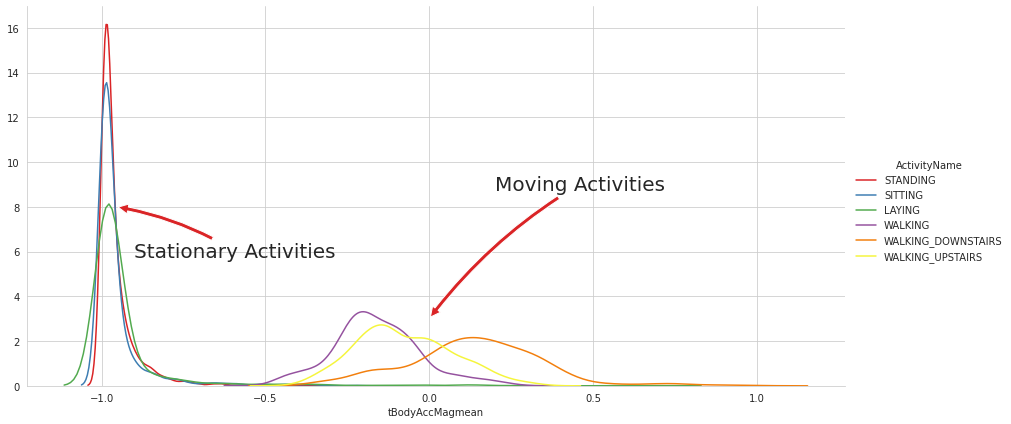

In [48]:
sns.set_palette("Set1", desat=0.90)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

plt.annotate("Stationary Activities", xy=(-0.956,8), xytext=(-0.9, 6), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

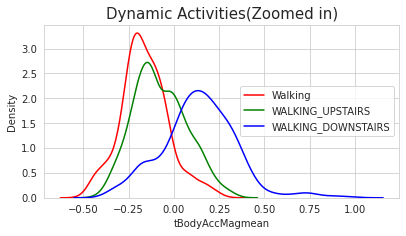

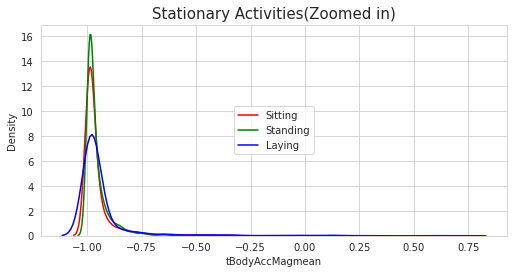

In [60]:
# for plotting purpose taking datapoints of each activity to a different dataframe

df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title("Dynamic Activities(Zoomed in)", fontsize=15)
sns.distplot(df1['tBodyAccMagmean'], color='r', hist=False, label='Walking')
sns.distplot(df2['tBodyAccMagmean'], color='g', hist=False, label='WALKING_UPSTAIRS')
sns.distplot(df3['tBodyAccMagmean'], color='b', hist=False, label='WALKING_DOWNSTAIRS')
plt.legend(loc='right')

plt.figure(figsize=(14,7))
plt.subplot(2,2,2)
plt.title('Stationary Activities(Zoomed in)', fontsize=15)
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'g',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'b',hist = False, label = 'Laying')
plt.legend(loc='center')

plt.tight_layout()
plt.show()

__we can easily distinguish between dynamic and stationary activities__

## 3. Magnitude of accelaration can seperate it well

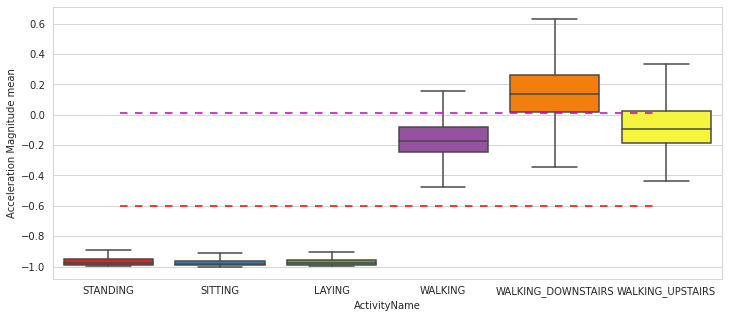

In [67]:
# https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/

plt.figure(figsize=(12,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train,showfliers=False,saturation=1)
plt.ylabel("Acceleration Magnitude mean")
plt.axhline(y=-0.6,xmin=0.1, xmax=0.9,dashes=(5,5),c='r')
plt.axhline(y=0.01,xmin=0.1, xmax=0.9,dashes=(5,5),c='m')

plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

## 4. Position of GravityAccelerationComponents can also matters

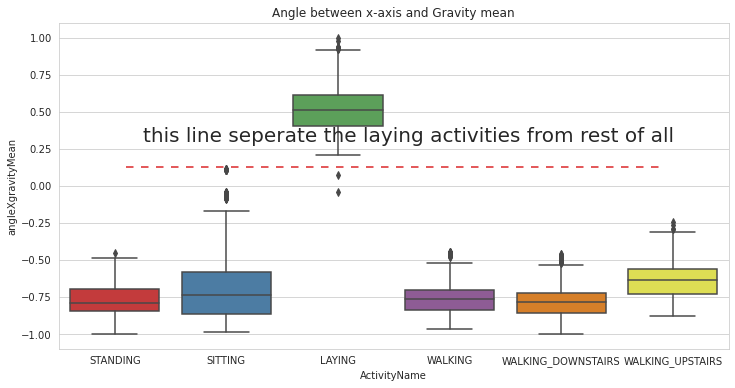

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ActivityName', y='angleXgravityMean',data=train)
plt.title("Angle between x-axis and Gravity mean")
plt.axhline(y=0.125, xmin=0.1, xmax=0.9, dashes=(5,5))
plt.annotate("this line seperate the laying activities from rest of all", xy=(0.25,0.4),xytext=(0.25,0.3), size=20)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

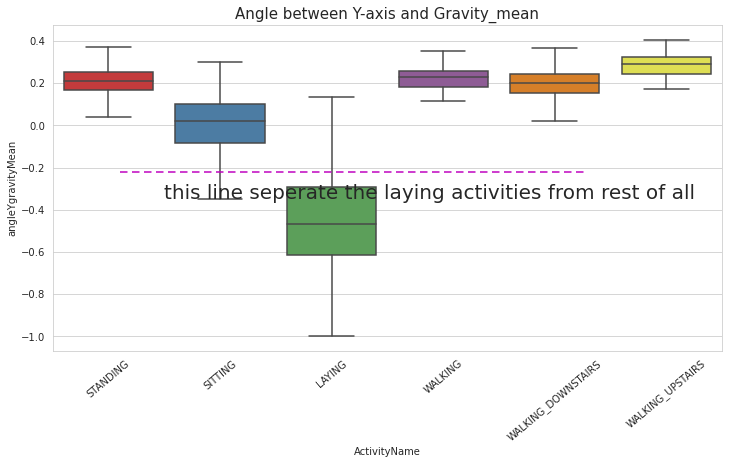

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.annotate("this line seperate the laying activities from rest of all", xy=(0.5,-0.35),xytext=(0.5,-0.35), size=20)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Applying t-sne on data

In [87]:
# performs t-sne with different perplexity values and their repective plots..

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def perform_tsne(X_data, y_data,perplexities,n_iter=1000,img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        print("\nperform t-sne with perplexity {} and with {} iterations at max".format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print("done...")
        
        # plotting the tsne
        print("Creating plot for t-sne visualization")
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data})
        
        # draw the plot 
        sns.lmplot(data=df,x='x',y='y', hue='label',fit_reg=False,size=6,palette='Set1',markers=['^','v','s','o', '1','2'])
        
        plt.title("perplexity :{} and max_iter :{}".format(perplexity,n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


perform t-sne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 2.774s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 124.6544189, gradient norm = 0.0287181 (50 iterations in 7.752s)
[t-SNE] Iteration 100: error = 106.7669525, gradient norm = 0.0321717 (50 iterations in 4.

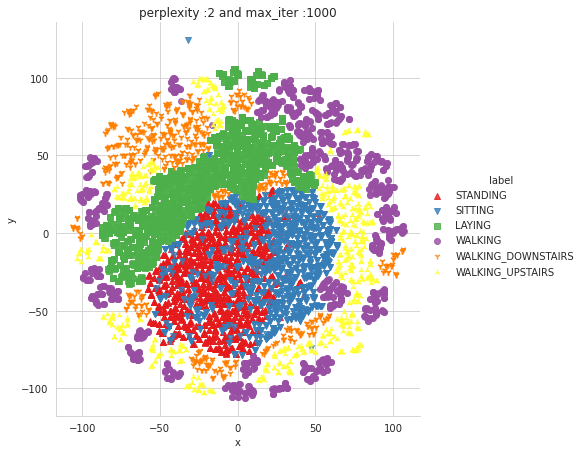

Done

perform t-sne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 2.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.089s
[t-SNE] Iteration 50: error = 113.9063644, gradient norm = 0.0227788 (50 iterations in 4.431s)
[t-SNE] Iteration 100: error = 97.7970734, gradient norm = 0.0171823 (50 iterations 

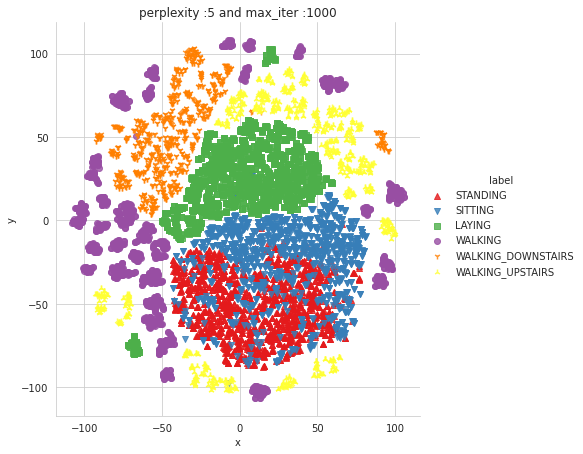

Done

perform t-sne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 2.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.139s
[t-SNE] Iteration 50: error = 106.0042572, gradient norm = 0.0170525 (50 iterations in 5.171s)
[t-SNE] Iteration 100: error = 91.0901871, gradient norm = 0.0105573 (50 iterations

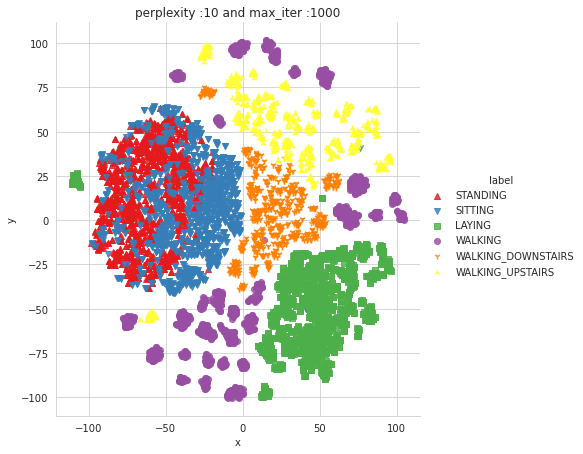

Done

perform t-sne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 3.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.300s
[t-SNE] Iteration 50: error = 97.3909836, gradient norm = 0.0219666 (50 iterations in 5.696s)
[t-SNE] Iteration 100: error = 84.0190735, gradient norm = 0.0059200 (50 iterations 

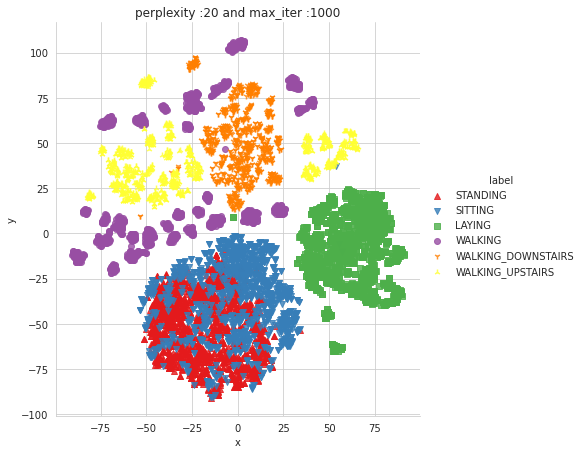

Done

perform t-sne with perplexity 35 and with 1000 iterations at max
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 2.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.375769
[t-SNE] Computed conditional probabilities in 0.558s
[t-SNE] Iteration 50: error = 90.7664185, gradient norm = 0.0183122 (50 iterations in 5.570s)
[t-SNE] Iteration 100: error = 78.9750290, gradient norm = 0.0048166 (50 iterations

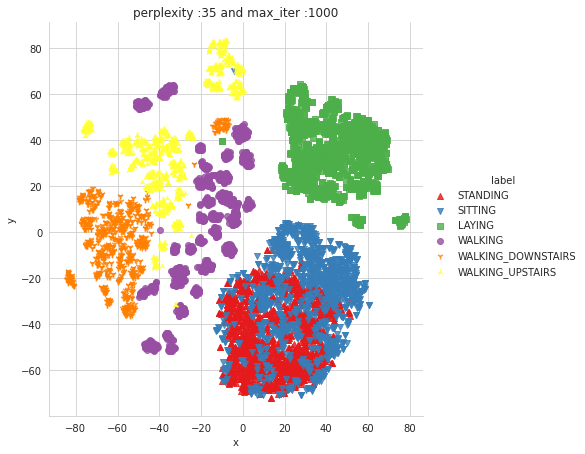

Done


In [88]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,35])